In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline


data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


# Visualizing data and some metrics

In [18]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


The average age is 61 years old in a range between 40 and 95 years old sample of population. 41.8% of them suffer from diabetes and 32% are smokers.

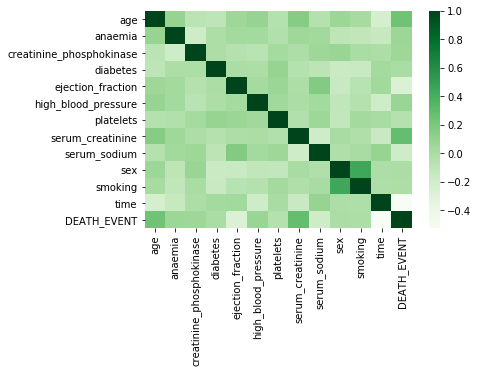

In [19]:
sns.heatmap(data.corr(),cmap='Greens')

In [20]:
data.corrwith(data['DEATH_EVENT'])

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
dtype: float64

The most correlated Series in this Dataframe with the DEATH_EVENT column are: age, ejection_fraction, serum_creatinine, serum_sodium and time. We should put focus on these factors in order to have a good vision of the situation.

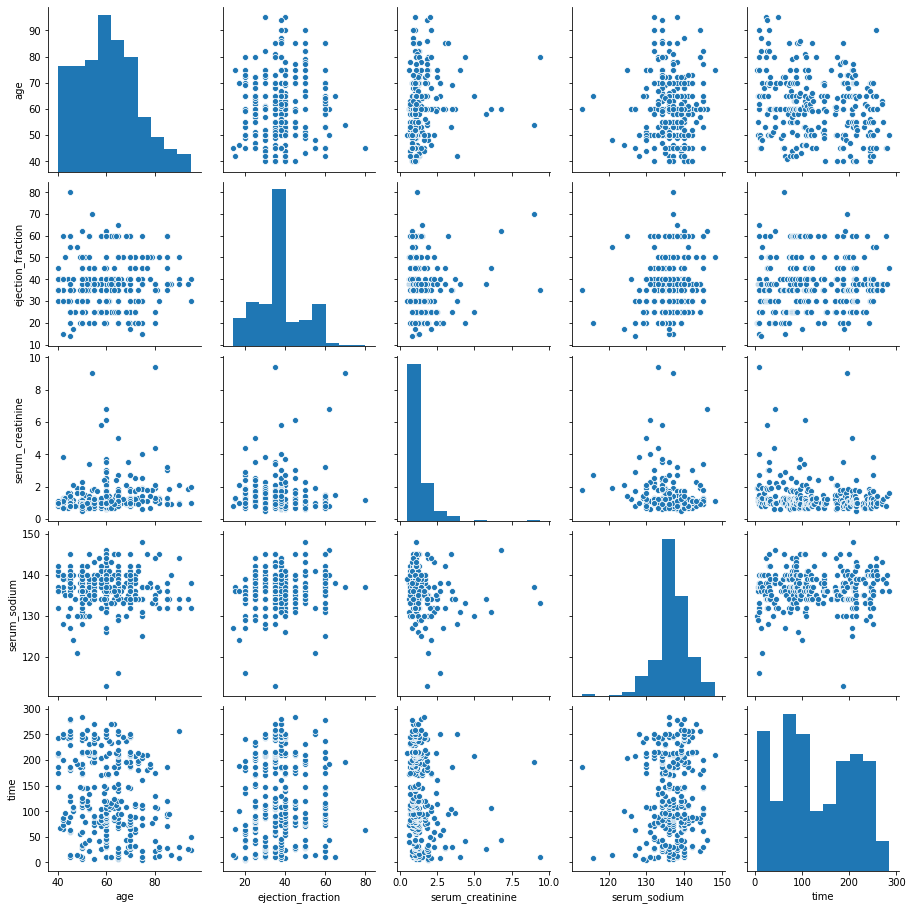

In [21]:
features = data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
sns.pairplot(features)

# Making predictions

In [29]:
X = features.values
y = data['DEATH_EVENT'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [35]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions_LR = lr.predict(X_test)
acc_LR = cross_val_score(lr,X_train,y_train,cv=10)
score = lr.score(X_test,y_test)
print('LogisticRegression score:  ',score)

LogisticRegression score:   0.8833333333333333


In [37]:
knn = KNeighborsClassifier(n_neighbors=12,p=2)
knn.fit(X_train,y_train)
predictions_KNN = knn.predict(X_test)
acc_KNN = cross_val_score(knn,X_train,y_train,cv=10)
score = knn.score(X_test,y_test)
print('KNeighborsClassifier score:  ',score)

KNeighborsClassifier score:   0.9


In [62]:
dtc = DecisionTreeClassifier(max_depth=2,max_features=3,)
dtc.fit(X_train,y_train)
predictions_DTC = dtc.predict(X_test)
acc_DTC = cross_val_score(dtc,X_train,y_train,cv=10)
score = dtc.score(X_test,y_test)
print('DecisionTreeClassifier score:  ',score)

DecisionTreeClassifier score:   0.8666666666666667


In [76]:
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=4)
rfc.fit(X_train,y_train)
predictions_RFC = rfc.predict(X_test)
acc_RFC = cross_val_score(rfc,X_train,y_train,cv=10)
score = rfc.score(X_test,y_test)
print('RandomForestClassifier score:  ',score)

RandomForestClassifier score:   0.9166666666666666


In [1]:
gbc = GradientBoostingClassifier(max_depth=2)
gbc.fit(X_train,y_train)
predictions_GBC = gbc.predict(X_test)
acc_GBC = cross_val_score(gbc,X_train,y_train,cv=10)
score = gbc.score(X_test,y_test)
print('GradientBoostingClassifier score:  ',score)

NameError: name 'GradientBoostingClassifier' is not defined

Seems like the best model to predict heart failure is the RandomForestClassifier with 91.6% of accuracy.